In [1]:
#Bibliotecas que voy a usar# 
import pandas as pd

In [2]:
#importar tabla 
path = 'C:/Users/WINDOWS 8.1/Desktop/maca/trabajo_final_alga-aras/tabla_trabajo_final.csv' 
sparks_data_list= pd.read_csv(path,sep=',') #tabla incorporada como dataframe y el archivo original cada columna separada por coma
del sparks_data_list['Unnamed: 0'] #borrar la columna 0
sparks_data_list.head()#mstrar las primeras filas de la tabla

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


### Registrar medidas caracteristicas

In [3]:
df=sparks_data_list

In [4]:
df.describe() # para obtenr medidas caracteristicas de cada ditribucion

,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
count,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2069.000000,2336.000000,2336.000000,2336.000000,2336.000000,2397.000000,2397.000000,2397.00000
mean,8.585616,16.546522,13.009426,10.145120,13.905734,0.307328,4.600599,7.418224,29.337625,3.433206,6.950771,0.090817,6.160103,14.815603,18.597413,1.53567
std,6.284302,15.008828,11.534076,6.351037,12.145036,0.803676,4.526220,21.870741,128.084665,21.580814,10.210784,0.107791,5.520145,6.206602,18.520580,0.49883
min,1.000000,2.636364,2.125000,0.000000,2.111111,-0.040698,1.000000,-47.481535,-4608.037502,-69.481535,-166.000000,-0.020349,-24.000000,4.000000,5.000000,1.00000
25%,4.000000,6.117647,5.482069,6.000000,5.571429,0.091938,1.000000,2.655810,8.907313,0.521316,3.000000,0.026786,3.000000,10.000000,11.000000,1.00000
50%,7.000000,7.732143,6.312500,9.000000,6.753378,0.154744,3.000000,5.372176,16.305071,1.379049,6.000000,0.056499,5.000000,14.000000,15.000000,2.00000
75%,12.000000,23.377404,18.333333,13.000000,19.620629,0.263229,7.000000,9.016228,32.808022,3.353218,9.000000,0.111471,9.000000,18.000000,20.000000,2.00000
max,48.000000,124.300000,98.600000,50.000000,98.666667,16.129630,43.000000,785.487402,1624.952729,783.487402,115.000000,1.008814,44.000000,56.000000,506.000000,2.00000


In [53]:
import numpy as np

# Calcular las estadísticas para cada columna
parametros = pd.DataFrame(columns=['Mediana', 'Moda', 'Percentil 25', 'Percentil 75', 'Rango',
                                   'Recorrido Intercuartil', 'Desviación Media', 'Varianza',
                                   'Desviación Típica', 'Coeficiente de Variación'])

for columna in df.columns:
    column_values = df[columna].dropna()
    mediana = np.median(column_values)
    moda = column_values.mode().values[0]
    percentile_25 = np.percentile(column_values, 25)
    percentile_75 = np.percentile(column_values, 75)
    rango = column_values.max() - column_values.min()
    interquartile_range = percentile_75 - percentile_25
    desviacion_media = np.mean(np.abs(column_values - np.mean(column_values)))
    varianza = np.var(column_values)
    desviacion_tipica = np.std(column_values)
    coeficiente_variacion = desviacion_tipica / np.mean(column_values)
    
    parametros.loc[columna] = [mediana, moda, percentile_25, percentile_75, rango,
                               interquartile_range, desviacion_media, varianza,
                               desviacion_tipica, coeficiente_variacion]

# Imprimir los resultados
print(parametros)


                        Mediana       Moda  Percentil 25  Percentil 75   
tiempo_maximo          7.000000   4.000000      4.000000     12.000000  \
intensidad_maxima      7.732143   6.000000      6.117647     23.377404   
intensidad_minima      6.312500   5.500000      5.482069     18.333333   
tiempo_valle           9.000000   7.000000      6.000000     13.000000   
intensidad_valle       6.753378   6.000000      5.571429     19.620629   
sparks_amplitud        0.154744   0.090909      0.091938      0.263229   
TTP                    3.000000   1.000000      1.000000      7.000000   
sparks_tiempo_pico50   5.372176   0.515968      2.655810      9.016228   
sp_tau                16.305071   7.488876      8.907313     32.808022   
TTP50                  1.379049   0.509692      0.521316      3.353218   
fullWidth              6.000000   2.000000      3.000000      9.000000   
(ΔF/F0)/ΔTmax          0.056499   0.037037      0.026786      0.111471   
fullDuration           5.000000   2.00

### Representar frecuencia de variable y distribucion

In [48]:
import scipy.stats as stats
from scipy.stats import normaltest

In [49]:
# Realizar el test de distribución para cada columna
for columna in df.columns:
    _, p_value = normaltest(df[columna])
    if p_value < 0.05:
        print(f"La columna {columna} no sigue una distribución normal")
    else:
        print(f"La columna {columna} sigue una distribución normal")

La columna tiempo_maximo sigue una distribución normal
La columna intensidad_maxima sigue una distribución normal
La columna intensidad_minima sigue una distribución normal
La columna tiempo_valle sigue una distribución normal
La columna intensidad_valle sigue una distribución normal
La columna sparks_amplitud sigue una distribución normal
La columna TTP sigue una distribución normal
La columna sparks_tiempo_pico50 sigue una distribución normal
La columna sp_tau sigue una distribución normal
La columna TTP50 sigue una distribución normal
La columna fullWidth sigue una distribución normal
La columna (ΔF/F0)/ΔTmax sigue una distribución normal
La columna fullDuration sigue una distribución normal
La columna width no sigue una distribución normal
La columna high no sigue una distribución normal
La columna flag no sigue una distribución normal


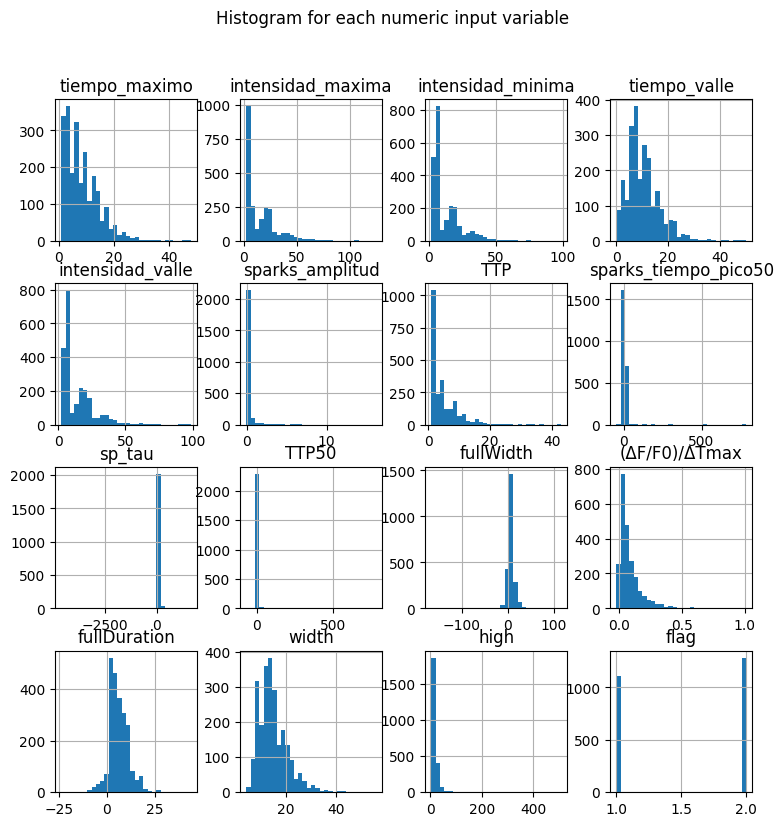

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
df.hist(bins=30, figsize=(9,9)) #obtener histograma para ver la distribucion de cada una de las variables
pl.suptitle("Histogram for each numeric input variable")#titulo de los graficos
plt.savefig('fruits_hist') #para guardar imagenes de los graficos
plt.show()#mostrar los graficos

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [35]:
means = np.mean(df, axis=0)

# Calcular la desviación estándar de cada columna
stds = np.std(df, axis=0, ddof=1)

# Crear un nuevo DataFrame con los resultados
result_df = pd.DataFrame({'Media': means, 'Desviación': stds})

# Imprimir el nuevo DataFrame
print(result_df)

                          Media  Desviación
tiempo_maximo          8.585616    6.284302
intensidad_maxima     16.546522   15.008828
intensidad_minima     13.009426   11.534076
tiempo_valle          10.145120    6.351037
intensidad_valle      13.905734   12.145036
sparks_amplitud        0.307328    0.803676
TTP                    4.600599    4.526220
sparks_tiempo_pico50   7.418224   21.870741
sp_tau                29.337625  128.084665
TTP50                  3.433206   21.580814
fullWidth              6.950771   10.210784
(ΔF/F0)/ΔTmax          0.090817    0.107791
fullDuration           6.160103    5.520145
width                 14.815603    6.206602
high                  18.597413   18.520580
flag                   1.535670    0.498830


### Calcular intervalo de confianza

In [14]:
# Calcular los intervalos de confianza para la media de cada columna
confidence_level = 0.95
confidence_intervals = {}

for column in df.columns:
    data = df[column]
    mean = np.mean(data)
    n = len(data)
    std_error = np.std(data, ddof=1) / np.sqrt(n)
    margin_of_error = std_error * stats.t.ppf((1 + confidence_level) / 2, n - 1)
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    confidence_intervals[column] = confidence_interval

# Imprimir los intervalos de confianza para la media de cada columna
for column, interval in confidence_intervals.items():
    print(f"Columna: {column}, Intervalo de Confianza: {interval}")


Columna: tiempo_maximo, Intervalo de Confianza: (8.333912176833373, 8.837320699878955)
Columna: intensidad_maxima, Intervalo de Confianza: (15.945375675467753, 17.147668607841407)
Columna: intensidad_minima, Intervalo de Confianza: (12.547453315481548, 13.471398726674671)
Columna: tiempo_valle, Intervalo de Confianza: (9.89074265986482, 10.399497066162578)
Columna: intensidad_valle, Intervalo de Confianza: (13.41929018617945, 14.392176986731409)
Columna: sparks_amplitud, Intervalo de Confianza: (0.27513833727765064, 0.33951736698111895)
Columna: TTP, Intervalo de Confianza: (4.419311283875328, 4.781887346261658)
Columna: sparks_tiempo_pico50, Intervalo de Confianza: (6.542237901113182, 8.294209287131823)
Columna: sp_tau, Intervalo de Confianza: (24.20746849558146, 34.467782388831026)
Columna: TTP50, Intervalo de Confianza: (2.5688331928058585, 4.297579748863807)
Columna: fullWidth, Intervalo de Confianza: (6.5417994766658865, 7.359741619224524)
Columna: (ΔF/F0)/ΔTmax, Intervalo de Conf

### Determinar tamaño de muestra

In [37]:
#####ESTA NOOOOOOO####


from statsmodels.stats.power import zt_ind_solve_power
tab = pd.DataFrame(result_df, index=['tiempo_maximo', 'intensidad_maxima', 'intensidad_minima', 
                               'tiempo_valle', 'intensidad_valle','sparks_amplitud','TTP',
                               'sparks_tiempo_pico50','sp_tau','TTP50','fullWidth','(ΔF/F0)/ΔTmax',
                               'fullDuration','width','high','flag'])

# Definir los parámetros
nivel_confianza = 0.95
margen_error = 0.05

# Calcular el tamaño muestral por categoría
tamanios_muestrales = {}

for categoria, valores in tab.iterrows():
    media = valores['Media']
    desviacion = valores['Desviación']
    
    # Calcular el tamaño muestral por categoría utilizando statsmodels
    tamanio_muestral = zt_ind_solve_power(effect_size=margen_error / desviacion,
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         alternative='two-sided')
    
    # Redondear al número entero más cercano
    tamanio_muestral = math.ceil(tamanio_muestral)
    
    tamanios_muestrales[categoria] = tamanio_muestral

# Crear un DataFrame con los tamaños muestrales
tammues = pd.DataFrame({'Tamaño Muestral Necesario': tamanios_muestrales})

# Imprimir el DataFrame de resultados
print(tammues)
print(tab)


# Crear una instancia de la clase TTestIndPower
#ttp = TTestIndPower()

# Calcular el tamaño muestral necesario
#n = ttp.solve_power(effect_size=effect_size, alpha=alpha, 
# power=power, ratio=1.0, alternative='two-sided')

# Imprimir el resultado
#print("El tamaño muestral necesario es:", round(n))


#Para resultados continuos, el tamaño del efecto se expresa como la
#  diferencia entre dos medias dividida por una desviación estándar;
# Para un resultado discreto/binario, el tamaño del efecto se puede expresar 
# como una razón de probabilidades (OR).

                      Tamaño Muestral Necesario
(ΔF/F0)/ΔTmax                                73
TTP                                      128638
TTP50                                   2924370
flag                                       1563
fullDuration                             191337
fullWidth                                654659
high                                    2153803
intensidad_maxima                       1414459
intensidad_minima                        835338
intensidad_valle                         926178
sp_tau                                103012724
sparks_amplitud                            4056
sparks_tiempo_pico50                    3003473
tiempo_maximo                            247977
tiempo_valle                             253272
width                                    241883
                          Media  Desviación
tiempo_maximo          8.585616    6.284302
intensidad_maxima     16.546522   15.008828
intensidad_minima     13.009426   11.534076
tiempo_v

In [39]:
import math
import pandas as pd
from statsmodels.stats.power import TTestIndPower

In [40]:
####Calculo del tamaño muestral###
tab = pd.DataFrame(result_df, index=['tiempo_maximo', 'intensidad_maxima', 'intensidad_minima', 
                               'tiempo_valle', 'intensidad_valle','sparks_amplitud','TTP',
                               'sparks_tiempo_pico50','sp_tau','TTP50','fullWidth','(ΔF/F0)/ΔTmax',
                               'fullDuration','width','high','flag'])

# Definir los parámetros
nivel_confianza = 0.95
margen_error = 0.05

#Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Calcular el tamaño muestral por categoría
tamanios_muestrales = {}

for categoria, valores in tab.iterrows():
    media = valores['Media']
    desviacion = valores['Desviación']
    
    # Calcular el tamaño muestral por categoría utilizando statsmodels
    tamanio_muestral = ttp.solve_power(effect_size=margen_error / desviacion,
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')
    
    # Redondear al número entero más cercano
    tamanio_muestral = math.ceil(tamanio_muestral)
    
    tamanios_muestrales[categoria] = tamanio_muestral

# Crear un DataFrame con los tamaños muestrales
tammues = pd.DataFrame({'Tamaño Muestral Necesario': tamanios_muestrales})

# Imprimir el DataFrame de resultados
print(tammues)

                      Tamaño Muestral Necesario
(ΔF/F0)/ΔTmax                                74
TTP                                      128639
TTP50                                   2924371
flag                                       1564
fullDuration                             191338
fullWidth                                654660
high                                    2153804
intensidad_maxima                       1414460
intensidad_minima                        835339
intensidad_valle                         926179
sp_tau                                103012726
sparks_amplitud                            4057
sparks_tiempo_pico50                    3003474
tiempo_maximo                            247978
tiempo_valle                             253273
width                                    241884


### Ensayo de hipotesis


Contrastes de hipótesis para dos o más poblaciones--> lo que me gustaria

sparks_amplitud, Intervalo de Confianza: (0.27513833727765064, 0.33951736698111895)

H0= el spark fue un error

H1= el spark es una lectura correcta

si spark_amplitud>0.27 entonces calculo medias para estos valores y planteo que cuando sea mayor H1=True

o

sparks_tiempo_al_pico_50, Intervalo de confianza (6.542237901113182, 8.294209287131823)

pero en grafico me da un valor cero para determinar dos grupos entonces

H0= los canales de Ca2+ no se al recibir el estimulo (<0)

H1= se abren los canales de Ca2+ (>0)


Contrastes de hipótesis para dos o más poblaciones--> lo que hice: estableci la poblacion por la flag determine que hiciera  la poblacion 1 la de flag 1 y poblacion 2 la de flag 2

In [63]:
## Contrastes de hipótesis para dos o más poblaciones

import pandas as pd
from scipy.stats import ttest_ind
# Iterar sobre cada columna y realizar el procedimiento
# Create an empty list to store the results
resultados = []

# Iterate over each column
for columna in df.columns[:-1]:  # Exclude the last column (Columna6)
    poblacion1 = df.loc[df['flag'] == 1, columna]
    poblacion2 = df.loc[df['flag'] == 2, columna]

    media_poblacion1 = poblacion1.mean()
    media_poblacion2 = poblacion2.mean()

    statistic, p_value = ttest_ind(poblacion1, poblacion2)

    resultado_columna = {'Columna': columna,
                         'Media Población 1': media_poblacion1,
                         'Media Población 2': media_poblacion2,
                         'Estadístico t': statistic,
                         'Valor p': p_value}

    resultados.append(resultado_columna)

# Convert the list of dictionaries to a DataFrame
resultados_df = pd.DataFrame(resultados)

# Print the results
print(resultados_df)

                 Columna  Media Población 1  Media Población 2  Estadístico t   
0          tiempo_maximo           9.036697           8.191011            NaN  \
1      intensidad_maxima          15.518443          17.445885            NaN   
2      intensidad_minima          12.421644          13.523617            NaN   
3           tiempo_valle          10.581651           9.763242            NaN   
4       intensidad_valle          13.205630          14.518183            NaN   
5        sparks_amplitud           0.252983           0.354868            NaN   
6                    TTP           4.756881           4.463884            NaN   
7   sparks_tiempo_pico50           8.427034           6.535717            NaN   
8                 sp_tau          35.392497          24.024503            NaN   
9                  TTP50           4.147217           2.808590            NaN   
10             fullWidth           6.757798           7.119583            NaN   
11         (ΔF/F0)/ΔTmax    

Análisis de dependencia de variables categóricas.

Esta relacionado el TTP on la amplitud del spark?

In [ ]:
## Análisis de dependencia de variables categóricas.
ss.chisquare(f_obs, f_exp=None, ddof=0, axis=0)


df2 = df1 ['RSV'] + df1 ['AdenoV']

a = df1 ['RSV'] == '+'
b = df1 ['AdenoV'] == '+'

#comparamos los datos en una tabla de contingencia
groups = df2.groupby([a,b]).count() 
print (groups)
#Test de comparación de datos cualitativos
print(ss.chisquare(groups, ddof=0, axis=0))

print(ss.fisher_exact(table, alternative='two-sided'))

In [ ]:
##Evaluar el ajuste de una recta de regresión e interpretar el coeficiente de correlación.